# Working with Text Data - Bag of Words 

## Pre-Processing steps & Convert Text to Numerical Vector

### Text Data


Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:

    1. Spell Checker, Keyword Search etc,
    2. Sentiment Analysis, Spam Classification
    3. Machine Translation
    4. Chatbots/Dialog Systems
    5. Question Answering Systems etc..,
    
However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
        

### Why NLP is hard?

  1. Complexity of representation
  2. Ambiguity in Natural Language


### Text Preprocessing
  1. Tokenisation
  2. Removing special characters
  3. Convert sentence into lower case
  4. Removing stop words
  5. Stemming or Lemmatization  

### Techniques to convert Text to Numerical Vectors
  1. Bag of Words
  2. TF IDF (Term Frequency - Inverse Document Frequency)
  3. Word2Vec (by Google)
  4. GloVe (Global Vectors by Stanford) 
  5. Pretrained GloVe Embeddings
  6. FastText (by Facebook) 
  7. ELMo (Embeddings from Language Models) 
  8. BERT (Bidirectional Encoder Representations from Transformer)

### Data Preparation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lst_text = ['it Was the best oF Times $', 
            'It was The worst of 23times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE %age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of 23times.
2,IT 9 was tHe age Of wisdom
3,it was thE %age of foolishness


In [4]:
import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jessy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jessy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jessy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [7]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

### Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

  1. ***Removing Special Characters and Punctuation***
  

  2. ***Converting to Lower Case -*** We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.
  

  3. ***Removing Stop Words -*** Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.
  

  4. ***Stemming or Lemmatization -*** Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.
  

In [8]:
raw_text = "This 1is Natural-LAnguage-Processing.& This is @Text pre-Processing4"
print(raw_text)

This 1is Natural-LAnguage-Processing.& This is @Text pre-Processing4


In [9]:
# Removing special characters and digits
sentence = re.sub("[^a-zA-Z]", " ", raw_text)
print(sentence)

This  is Natural LAnguage Processing   This is  Text pre Processing 


In [10]:
# change sentence to lower case
sentence = sentence.lower()
print(sentence)

this  is natural language processing   this is  text pre processing 


In [11]:
# tokenize into words
tokens = sentence.split()
print(tokens)

['this', 'is', 'natural', 'language', 'processing', 'this', 'is', 'text', 'pre', 'processing']


In [12]:
# Removing stop words
clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
print(clean_tokens)

['natural', 'language', 'processing', 'text', 'pre', 'processing']


In [13]:
# Stemming
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
print(clean_tokens_stem)

['natur', 'languag', 'process', 'text', 'pre', 'process']


In [14]:
# Lemmatizing
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(clean_tokens_lem)

['natural', 'language', 'processing', 'text', 'pre', 'processing']


## Lets put it all together in function

In [15]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [16]:
temp_df = df['text'].apply(lambda x : preprocess(x, 'stem'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [17]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [18]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of 23times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE %age of foolishness,age foolish,2


In [19]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [20]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [21]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of 23times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE %age of foolishness,age foolish,2,age foolishness,2


# Bag of Word Representation

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This

specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation.

Documents are described by word occurrences while completely ignoring the relative position information of the words in the 

document.


We will use `CountVectorizer` to convert ***text into a matrix of token count.***

`Bag of Words`: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

`Code Example`: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

***We are going to perform below mentioned steps to understand the entire process:***

 1. Converting text to numerical vectors with the help of `CountVectorizer`
 
 2. Understand `fit` and `transform`
 
 3. Looking at `vocabulary_`
 
 4. Converting `sparse matrix` to dense matrix using `toarray()`
 
 5. Understanding `n_gram`
 
 
 
### Advantages

 1. It is simple to understand and implement like OneHotEncoding.
 
 
 2. We have a fixed length encoding for any sequence of arbitrary length.
 
 
 3. Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary,           they’ll be closer to each other in the vector space and vice versa.
 
 
### Disadvantages

1. The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it    is by limiting the vocabulary to n number of the most frequent words.


2. It does not capture the similarity between different words that mean the same thing.i.e.`Semantic Meaning` is not                  captured.

   > a. "walk", "walked", and "walking". BoW vectors of all three tokens will be equally apart.
    
   > b. "search" and "explore" are synonyms. BoW won't capture the semantic similarity of these words.


3. This representation does not have any way to handle `out of vocabulary (OOV)`words (i.e., new words that were not seen in the     corpus that was used to build the vectorizer).


4. As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it 
   is by using `n-grams`.
   
   
5. It suffers from ***curse of high dimensionality.***

In [22]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of 23times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE %age of foolishness,age foolish,2,age foolishness,2


In [23]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

dtm = vocab.fit_transform(df['clean_text_lemma'])

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)

In [24]:
# We can look at unique words by using 'vocabulary_'

vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [25]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [27]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word. 
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [28]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [29]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [30]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))


,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [31]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(df.clean_text_stem)

In [32]:
print(vocab.vocabulary_)


{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [33]:
# convert sparse matrix to numpy array
print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [34]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))


,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


#### Observations:

1. `vect.fit(lst_text)` **learns the vocabulary**
2. `vect.transform(lst_text)` **uses the fitted vocabulary to build a document-term matrix**

## Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document

being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to 

quantify the importance of a given word relative to other words in the document and in the corpus.

***

Let's now try to understand:

1. Term Frequency
2. Inverse Document Frequency





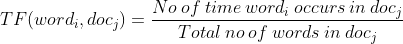

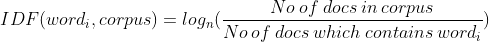

***

### Advantages

1. If the word is rare in the corpus, it will be given more importance. (i.e. IDF)
2. If the word is more frequent in a document, it will be given more importance. (i.e. TF)

### Disadvantages

> ***Same as BOW***

In [35]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [36]:
print(vectorizer.vocabulary_)


{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [37]:
# convert sparse matrix to nparray
print(dtm.toarray()) 

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [38]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))


,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


## Latent Space


A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in 
which items which resemble each other more closely are positioned closer to one another in the latent space.

## Word Embeddings (Word Vectors)

In natural language processing (NLP), [word embedding](https://en.wikipedia.org/wiki/Word_embedding) is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of [language modeling](https://en.wikipedia.org/wiki/Language_model) and [feature learning](https://en.wikipedia.org/wiki/Feature_learning) techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.


Methods to generate this mapping include **neural networks**, **dimensionality reduction on the word co-occurrence matrix**, **probabilistic models**, **explainable knowledge base method**, and **explicit representation in terms of the context in which words appear**.


Traditionally, one of the main **limitations of word embeddings** (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, [polysemy](https://en.wikipedia.org/wiki/Polysemy) and [homonymy](https://en.wikipedia.org/wiki/Homonym) are not handled properly.


## Word2Vec




"You shall know the word by the company it keeps." by JR Firth

***Distributional Semantics (i.e. a word is characterized by the company it keeps)***

W2v works well because there is an idea of meaning distribution in the context.


***Algorithms to generate Word2Vec Embeddings***

 1. SkipGram
 2. Continuous Bag of Words
 
***Issue***

Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is,

 - Is it possible to segregate the three vectors to represent the words based in the context?
 - Is it possible to disambiguate the word vectors based on the context?

Word2Vec is not capturing the contextual information. This is where BERT comes handy.

**`! pip install gensim`**

**`! pip install --upgrade gensim`**

Run this in command promp (admin mode)

In [39]:
! pip install --upgrade gensim


     ---------------------------------------- 24.0/24.0 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [40]:
import gensim

print(gensim.__version__)

4.2.0


In [41]:
from gensim.models import Word2Vec


In [42]:
df['tokenised_sentences'] = df.clean_text_stem.apply(lambda sent : sent.split())

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of 23times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE %age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


In [43]:
list(df.tokenised_sentences)


[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [44]:
# train model

model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [45]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [46]:
# Total Documents
model.corpus_count

4

In [47]:
# Looking at the vocabulary

print(model.wv.key_to_index)

print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [48]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 -1.3754654e-03
  7.6685809e-03  7.3464084e-03 -3.6732983e-03  2.6427007e-03
 -8.3171297e-03  6.2054847e-03 -4.6373224e-03 -3.1641079e-03
  9.3113566e-03  8.7338447e-04  7.4907015e-03 -6.0740639e-03
  5.1605059e-03  9.9228211e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648384e-03 -4.8626517e-03 -3.7785650e-03 -8.5362010e-03
  7.9556061e-03 -4.8439382e-03  8.4236125e-03  5.2625705e-03
 -6.5500261e-03  3.9578700e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257271e-03 -1.5815735e-03
 -4.0343284e-04  3.2996845e-03  1.4418793e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936899e-03
  3.9735888e-03  4.5294715e-03  1.4343048e-03 -2.6998566e-03
 -4.3668128e-03 -1.0320758e-03  1.4370275e-03 -2.6460099e-03
 -7.0737838e-03 -7.8053069e-03 -9.1217877e-03 -5.9351707e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606713e-03 -3.7173224e-03
  4.2891572e-03 -3.7390448e-03  8.3781742e-03  1.5339922e-03
 -7.2423196e-03  9.43379

In [49]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
  -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
  -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
  -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
   8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
  -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
   4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
  -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
   4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
  -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [50]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)


(6, 100)


In [ ]:
# save model
# model.save('model/first_word_vectors.bin')

# # load model
# new_model = Word2Vec.load('model/first_word_vectors.bin')
# print(new_model)

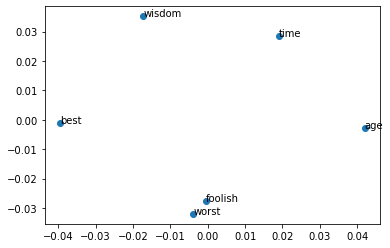

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.wv.__getitem__(model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [52]:
model.wv.similarity('best', 'worst')


0.13887985

In [53]:
model.wv.most_similar('foolish')


[('worst', 0.17018882930278778),
 ('best', 0.06408979743719101),
 ('wisdom', -0.013514960184693336),
 ('time', -0.02367166243493557),
 ('age', -0.052346743643283844)]

In [54]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of 23times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE %age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"
